## Ukrainian automotive market 2013-2019 (tentative title)
***

Data is publically accessible at [Ukrainian Open Data Portal](https://data.gov.ua)

Anonymized annual datasets of [vehicle owners](https://data.gov.ua/en/dataset/06779371-308f-42d7-895e-5a39833375f0) for the period from 01-January-2013 till 12-October-2019 was used in analysis.
***

Questions to answer with this data (for the specific kind of transport):
1. Most popular brands with their top models
2. Preferred car colours
3. Local vs global trends over the time period
4. Vip car plates rating
5. Fuel and engine types
6. UA car owners map (visalization: brand/model per region of registration)
7. Most popular car bodies
***

### 1. Data export from CSV-files

In [1]:
import pandas as pd
import numpy as np

from pprint import pprint

%timeit

In [2]:
files = []
# files = !ls -d "$PWD"/datasets/* | grep tz_opendata # Absolute path
files = !ls -d ./datasets/* | grep tz_opendata # relative path
files

['./datasets/tz_opendata_z01012013_po31122013.csv',
 './datasets/tz_opendata_z01012014_po31122014.csv',
 './datasets/tz_opendata_z01012015_po31122015.csv',
 './datasets/tz_opendata_z01012016_po31122016.csv',
 './datasets/tz_opendata_z01012017_po31122017.csv',
 './datasets/tz_opendata_z01012018_po01012019.csv',
 './datasets/tz_opendata_z01012019_po01112019.csv']

In [ ]:
#    This Cell normally can be skipped.
#    It was used for TEST of the 2019 dataset having some incorrect data. 


#map_cols_dtypes = {'own_weight': np.float64,
#                   'OWN_WEIGHT': np.float64,
#                   'total_weight':np.float64,
#                   'TOTAL_WEIGHT':np.float64,
#                   'n_reg_new': object
#                  }

#df_ = pd.read_csv(files[6], sep=';', 
#                      parse_dates=['d_reg'], 
#                      index_col='d_reg', 
#                      low_memory=False,
#                      dtype=map_cols_dtypes,
#                      error_bad_lines=False,
#                     )



In [ ]:
# %timeit -r1 df = pd.read_csv(files[0], sep=';', parse_dates=['d_reg'], index_col='d_reg', low_memory=False)
# df = pd.read_csv(files[6], sep=';', parse_dates=['d_reg'], index_col='d_reg', low_memory=False)

In [3]:
'''
    Export data from annual csv-files into one merged dataset.
    
    Original 2019 csv-file data cleaned manually before export. 
    Removed "," used as decimal separator in several columns.
'''

df = pd.DataFrame()

map_cols_dtypes = {'own_weight': np.float64,
                   'OWN_WEIGHT': np.float64,
                   'total_weight': np.float64,
                   'TOTAL_WEIGHT': np.float64,
                   'n_reg_new': object
                  }

for i, file in enumerate(files):
    df_ = pd.read_csv(file, sep=';', 
                      parse_dates=['d_reg'], 
                      index_col='d_reg',
                      skipinitialspace=True,
                      dtype=map_cols_dtypes,
                      error_bad_lines=False,
                     )
    
    df_.rename(str.capitalize, axis='columns', inplace=True)
    df = df.append(df_).sort_index()
    print("Finished loop {} of {} for file: {}".format(i+1, len(files), file))
    
print("All done!")

Finished loop 1 of 7 for file: ./datasets/tz_opendata_z01012013_po31122013.csv
Finished loop 2 of 7 for file: ./datasets/tz_opendata_z01012014_po31122014.csv
Finished loop 3 of 7 for file: ./datasets/tz_opendata_z01012015_po31122015.csv
Finished loop 4 of 7 for file: ./datasets/tz_opendata_z01012016_po31122016.csv
Finished loop 5 of 7 for file: ./datasets/tz_opendata_z01012017_po31122017.csv
Finished loop 6 of 7 for file: ./datasets/tz_opendata_z01012018_po01012019.csv
Finished loop 7 of 7 for file: ./datasets/tz_opendata_z01012019_po01112019.csv
All done!


In [4]:
# Drop useless columns

df.drop(axis='columns', columns='Reg_addr_koatuu', inplace=True)

In [5]:
# Strip models from records in "Brand" column. Models are stored in "Model" column.

df1 = df.copy()
df.Brand = df1.Brand.apply(lambda x: x.split('  ')[0])

In [ ]:
# Convert Make_year to datetime format

# df2 = df.copy()
# df2.Make_year = pd.to_datetime(df.Make_year, format='%Y', yearfirst=True)

In [6]:
df.sample(3)

,Person,Oper_code,Oper_name,Dep_code,Dep,Brand,Model,Make_year,Color,Kind,Body,Purpose,Fuel,Capacity,Own_weight,Total_weight,N_reg_new
d_reg,,,,,,,,,,,,,,,,,
2013-02-19,P,530,530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ,1363302,(6302) ВРЕР ДАІ з обслуговування м. Харків та...,HONDA,CIVIC,2006,БЕЖЕВИЙ,ЛЕГКОВИЙ,КОМБІ-B,ЗАГАЛЬНИЙ,БЕНЗИН,1799.0,1265.0,1750.0,21АІ9244
2015-05-12,P,69,69 - РЕЄСТРАЦІЯ ТЗ ПО АКТУ ПРИЙОМУ-ПЕРЕДАЧІ,1371305,(7105) ВРЕР ДАІ з обслуговування Золотоніськог...,КРД,050100,2014,СИНІЙ,ПРИЧІП,ПР-ЛЕГКОВИЙ-B,ЗАГАЛЬНИЙ,NaN,NaN,180.0,750.0,СА2651ХО
2014-12-26,P,309,309 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВОГО ВЛАСНИКА ЗА ...,1346301,(4601) ВРЕР ДАІ з обслуговування м. Львова та...,HYUNDAI,SANTA FE,2006,СІРИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,2188.0,1760.0,2520.0,АН2458НР


In [93]:
# Discover top values counted for each dataset parameter
top = 5

for c in df.columns:
    print('Top {} most popular values of the "{}":\n{}\n'.format(top, c, df[c].value_counts().head(top)))

Top 5 most popular values of the <font color=red>"Person"</font>:
P    9699385
J    1101144
Name: Person, dtype: int64

Top 5 most popular values of the <font color=red>"Oper_code"</font>:
315    1505636
530    1300582
40     1142319
400     870893
308     750805
Name: Oper_code, dtype: int64

Top 5 most popular values of the <font color=red>"Oper_name"</font>:
530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ                                   1300546
40 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬНІЙ ОРГАНІЗАЦІЇ     1142105
315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ УКЛАДЕНОМУ В ТСЦ    1038547
309 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВОГО ВЛАСНИКА ЗА ДОВІДКОЙ-РАХУНОК          626814
400 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ПЕРЕОБЛАДНАННI БЕЗ ЗАМIНИ НОМЕРНИХ АГРЕГ.      595513
Name: Oper_name, dtype: int64

Top 5 most popular values of the <font color=red>"Dep_code"</font>:
8046    167850
4641    133013
8044    127864
6341    120586
8041    117125
Name: Dep_code, dtype: int64

Top 5 most popular values of the <fon

In [8]:
vip_plates = [
    '1111', '2222', '3333', '4444', '5555', '6666', '7777', '8888', '9999',
    '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009',
    '7000', '7700', '7770', '0777', '0077',
    '0666','0066', '6660',
    '8998', '9889', '3443', '4334', '1881',
    '1234', '0123',
]

vip_plates_number = {}

for p in vip_plates:
    cnt = df[df.N_reg_new.str.contains(p, na=False)].Person.count()
    vip_plates_number[p] = cnt
    #print('Plate "{}" found in DB {} times'.format(p, cnt))

In [96]:
start_from = 0
step = 30

till_rank = start_from + step

rank = start_from + 1

for p, cnt in sorted(vip_plates_number.items(), key=lambda kv: kv[1], reverse=True)[start_from:till_rank]:
    print('Rank ({}): Plate "{}" used {} times'.format(rank, p, cnt))
    rank += 1

Rank (1): Plate "0001" used 5103 times
Rank (2): Plate "7777" used 4988 times
Rank (3): Plate "8888" used 4477 times
Rank (4): Plate "0777" used 4087 times
Rank (5): Plate "7770" used 3663 times
Rank (6): Plate "7000" used 3292 times
Rank (7): Plate "1111" used 3131 times
Rank (8): Plate "0077" used 2752 times
Rank (9): Plate "9999" used 2588 times
Rank (10): Plate "0007" used 2462 times
Rank (11): Plate "1234" used 2215 times
Rank (12): Plate "3333" used 1902 times
Rank (13): Plate "5555" used 1879 times
Rank (14): Plate "7700" used 1846 times
Rank (15): Plate "4444" used 1844 times
Rank (16): Plate "2222" used 1735 times
Rank (17): Plate "0066" used 1609 times
Rank (18): Plate "0123" used 1598 times
Rank (19): Plate "0008" used 1518 times
Rank (20): Plate "8998" used 1515 times
Rank (21): Plate "1881" used 1494 times
Rank (22): Plate "0003" used 1468 times
Rank (23): Plate "0666" used 1453 times
Rank (24): Plate "0002" used 1431 times
Rank (25): Plate "0005" used 1409 times
Rank (26)

### EDA of exported dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10800529 entries, 2013-01-01 to 2019-12-10
Data columns (total 17 columns):
Person          object
Oper_code       int64
Oper_name       object
Dep_code        int64
Dep             object
Brand           object
Model           object
Make_year       int64
Color           object
Kind            object
Body            object
Purpose         object
Fuel            object
Capacity        float64
Own_weight      float64
Total_weight    float64
N_reg_new       object
dtypes: float64(3), int64(3), object(11)
memory usage: 1.4+ GB


In [14]:
df.isnull().sum()

Person               0
Oper_code            0
Oper_name            0
Dep_code             0
Dep                  0
Brand                0
Model                0
Make_year            0
Color                0
Kind                 0
Body                 0
Purpose              0
Fuel            579258
Capacity        606305
Own_weight       80237
Total_weight     12027
N_reg_new       109642
dtype: int64

In [17]:
df.Oper_name[df.N_reg_new.isnull()].unique()[:20]

array(['540 - ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ',
       '530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ',
       "500 - ЗНЯТТЯ З ОБЛІКУ У ЗВ'ЯЗКУ ЗІ СКАСУВАННЯМ РЕЄСТРАЦІЇ",
       '550 - ЗНЯТТЯ З ОБЛIКУ ТЗ ВВЕЗЕНОГО ПIД ЗОБОВ. ПРО ЗВОР. ВИВЕЗЕННЯ',
       "542 - ЗНЯТТЯ З ОБЛІКУ У ЗВ'ЯЗКУ З УТІЛІЗАЦІЄЮ",
       '256 -  АНУЛЮВАННЯ ВИДАЧI ТИМЧАС. РЕЕСТР. ТАЛОНУ ПО ЗАЯВI ВЛ',
       '540 -  ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ',
       '550 -  ЗНЯТТЯ З ОБЛIКУ ТЗ ВВЕЗЕНОГО ПIД ЗОБОВ. ПРО ЗВОР. ВИВЕЗЕННЯ',
       '309 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВОГО ВЛАСНИКА ЗА ДОВІДКОЙ-РАХУНОК',
       '510 - ЗНЯТТЯ З ОБЛІКУ ПРИ ЗМІНІ МІСЦЯ ПРОЖИВАННЯ В МЕЖАХ УКРАЇНИ',
       '501 - АНУЛЮВАННЯ ЗНЯТТЯ З ОБЛІКУ ТЗ',
       "343 - ПЕРЕРЕЄСТРАЦІЯ У ЗВ'ЯЗКУ ІЗ ЗМІНОЮ ДАНИХ ВЛАСНИКА АБО ТЗ ОТРИМАНОГО ЧЕРЕЗ ВІДДІЛ СОЦЗАХИСТУ",
       '560 -  ЗНЯТТЯ З ОБЛІКУ ПРИ ПОВЕРНЕННІ ІЗ ПОЇЗДКИ ЗА КОРДОН ПО ДОРУЧ.',
       '310 - ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ. КУПIВЛI-ПРОДАЖУ',
       '331 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ

In [ ]:
# Export DataFrame with cleaned data to csv-file

# df.to_csv('UA_TZ_registration_licenses_01-01-2013_01-01-2019.csv')

In [18]:
# Example of search for a specific car

df_cx5 = df[(df['Brand'] == 'MAZDA') 
   & (df['Model'] == 'CX-5')
   & (df['Fuel'] == 'ДИЗЕЛЬНЕ ПАЛИВО')
   & (df['Make_year'] == 2015)
   & (df['Color'] == 'СІРИЙ')
   & (df['N_reg_new'].str.contains('7379', na=False))
      ]
df_cx5

,Person,Oper_code,Oper_name,Dep_code,Dep,Brand,Model,Make_year,Color,Kind,Body,Purpose,Fuel,Capacity,Own_weight,Total_weight,N_reg_new
d_reg,,,,,,,,,,,,,,,,,
2015-12-05,P,100,100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГ...,8043,Центр 8043,MAZDA,CX-5,2015,СІРИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,2191.0,1570.0,2050.0,АА7379ОХ


In [ ]:
# Who is the new owner of ex-mine Fabia?

df[
    (df['N_reg_new'].str.startswith('АЕ', na=False)) 
   & (df['Brand'] == 'SKODA')
   & (df.Model == 'FABIA')
    & (df.Color == 'СІРИЙ')
    & (df.Make_year == 2008)
  ]['2016-1']

In [83]:
# Top road police service operation codes

top_codes = df.groupby('Oper_code').Person.count().sort_values(ascending=False)[:10]
top_codes

Oper_code
530    1300581
40     1142308
315    1038547
400     755255
309     628457
100     502587
308     423199
310     334103
70      295156
440     238817
Name: Person, dtype: int64

In [89]:
df.Oper_name[df.Oper_name.str.contains('ЗНЯТТЯ', na=False)].unique()

array(['530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ',
       '534 - ЗНЯТТЯ З ОБЛІКУ ЗА АКТОМ ПРИЙОМА-ПЕРЕДАЧІ',
       '560 -  ЗНЯТТЯ З ОБЛІКУ ПРИ ПОВЕРНЕННІ ІЗ ПОЇЗДКИ ЗА КОРДОН ПО ДОРУЧ.',
       '540 - ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ',
       '533 - ЗНЯТТЯ З ОБЛIКУ ЗА ДОГОВОРОМ ДАРУВАННЯ ЧИ ЗАПОВІТОМ',
       '510 - ЗНЯТТЯ З ОБЛІКУ ПРИ ЗМІНІ МІСЦЯ ПРОЖИВАННЯ В МЕЖАХ УКРАЇНИ',
       "500 - ЗНЯТТЯ З ОБЛІКУ У ЗВ'ЯЗКУ ЗІ СКАСУВАННЯМ РЕЄСТРАЦІЇ",
       '520 - ЗНЯТТЯ З ОБЛIКУ ПРИ ВИЇЗДІ ЗА КОРДОН НА ПОСТ. МІСЦЕ ПРОЖИВ.',
       '143 - ПОНОВЛЕННЯ РЕЄСТР. ПІСЛЯ УМОВН. ЗНЯТТЯ З ОБЛ. З НЕПР. ТО',
       '570 - ЗНЯТТЯ З ОБЛІКУ У ЗВ`ЯЗКУ ЗI ЗМIНОЮ ОРГАНУ РЕЄСТРАЦІЇ',
       '531 - ЗНЯТТЯ З ОБЛIКУ ЗА ДОГОВОРОМ КУПIВЛI-ПРОДАЖУ',
       '550 - ЗНЯТТЯ З ОБЛIКУ ТЗ ВВЕЗЕНОГО ПIД ЗОБОВ. ПРО ЗВОР. ВИВЕЗЕННЯ',
       '532 - ЗНЯТТЯ З ОБЛIКУ ЗА ДОГОВОРОМ МІНИ',
       '500 - ЗНЯТТЯ З ОБЛІКУ У ЗВ`ЯЗКУ З АНУЛЮВАННЯМ РЕЄСТРАЦІЇ',
       '554 - ЗНЯТТЯ З ОБЛІКУ ТЗ ЗА АКТОМ ПРИЙОМУ-ПЕРЕДАЧІ',
       "552 - З

In [81]:
# Registration codes and names

for n, code in enumerate(top_codes.index, start=1):
    print('Category {}:\n{}\n'.format(n, df.Oper_name[df.Oper_code == code].unique()))

Category 1:
['530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ'
 '530 -  ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ']

Category 2:
['40 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬНІЙ ОРГАНІЗАЦІЇ'
 '40 -  ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬНІЙ ОРГАНІЗАЦІЇ']

Category 3:
['315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ УКЛАДЕНОМУ В ТСЦ']

Category 4:
['400 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ПЕРЕОБЛАДНАННI БЕЗ ЗАМIНИ НОМЕРНИХ АГРЕГ.'
 '400 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ПЕРЕОБЛАДНАННI БЕЗ ЗАМІНИ НОМЕРНИХ АГРЕГАТІВ'
 '400 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ПЕРЕОБЛАДНАННI ДЛЯ РОБОТИ НА ГАЗОВОМУ ПАЛЬНОМУ'
 '400 -  ПЕРЕРЕЄСТРАЦIЯ ПРИ ПЕРЕОБЛАДНАННI БЕЗ ЗАМIНИ НОМЕРНИХ АГРЕГ.']

Category 5:
['309 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВОГО ВЛАСНИКА ЗА ДОВІДКОЙ-РАХУНОК'
 '309 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВОГО ВЛАСНИКА ЗА ДОВІДКОЮ-РАХУНКОМ'
 '309 -  ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВОГО ВЛАСНИКА ЗА ДОВІДКОЙ-РАХУНОК']

Category 6:
['100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, УСТАНОВИ'
 '100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ

In [19]:
# First registration of a new cars

df_new_cars = df[(df['Oper_code'] == 100) & (~df['Oper_name'].str.contains('Б/В', na=False))]
df_new_cars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 488270 entries, 2013-01-02 to 2019-07-23
Data columns (total 17 columns):
Person          488270 non-null object
Oper_code       488270 non-null int64
Oper_name       488270 non-null object
Dep_code        488270 non-null int64
Dep             488270 non-null object
Brand           488270 non-null object
Model           488270 non-null object
Make_year       488270 non-null int64
Color           488270 non-null object
Kind            488270 non-null object
Body            488270 non-null object
Purpose         488270 non-null object
Fuel            455361 non-null object
Capacity        451349 non-null float64
Own_weight      488058 non-null float64
Total_weight    488227 non-null float64
N_reg_new       488270 non-null object
dtypes: float64(3), int64(3), object(11)
memory usage: 67.1+ MB


In [20]:
# Annual totals

df_new_cars.resample('A').Person.count()

d_reg
2013-12-31     26224
2014-12-31     67377
2015-12-31     78333
2016-12-31     96174
2017-12-31    127666
2018-12-31     92489
2019-12-31         7
Freq: A-DEC, Name: Person, dtype: int64

In [21]:
# First registration of a used cars

df_used_cars = df[(df['Oper_code'] == 100) & (df['Oper_name'].str.contains('Б/В', na=False))]
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73022 entries, 2018-08-29 to 2019-12-10
Data columns (total 17 columns):
Person          73022 non-null object
Oper_code       73022 non-null int64
Oper_name       73022 non-null object
Dep_code        73022 non-null int64
Dep             73022 non-null object
Brand           73022 non-null object
Model           73022 non-null object
Make_year       73022 non-null int64
Color           73022 non-null object
Kind            73022 non-null object
Body            73022 non-null object
Purpose         73022 non-null object
Fuel            61241 non-null object
Capacity        58655 non-null float64
Own_weight      73022 non-null float64
Total_weight    73022 non-null float64
N_reg_new       73022 non-null object
dtypes: float64(3), int64(3), object(11)
memory usage: 10.0+ MB


In [22]:
# Annual totals

df_used_cars.resample('A').Person.count()

d_reg
2018-12-31    14324
2019-12-31    58698
Freq: A-DEC, Name: Person, dtype: int64

### Data visualization

#### Plan of the section: 

- Matplotlib visalization for various aggregated categorical data
- Timeseries for individual brand, types, models, etc.
- Predictions for the future sales/trends

In [23]:
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

%matplotlib inline

In [ ]:
s = plt.style.available
print(s)

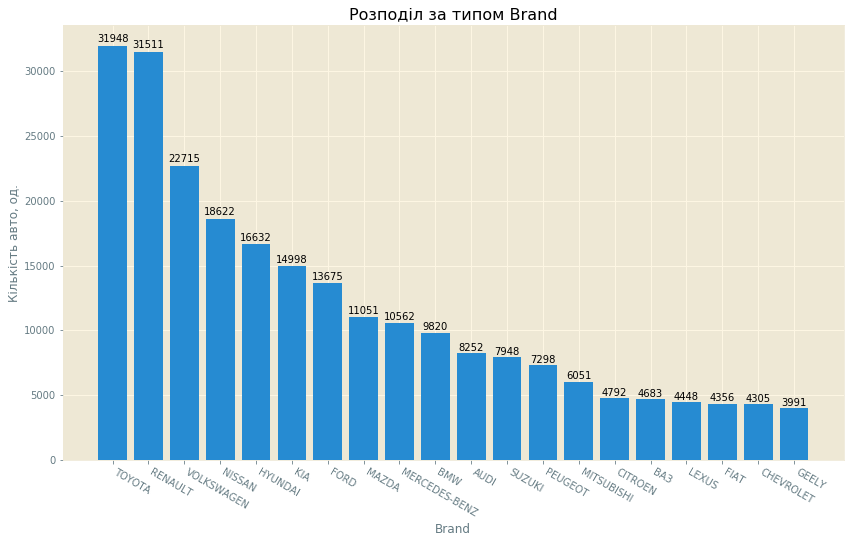

In [94]:
# Prepare data
params = ['Fuel', 'Brand', 'Model', 'Color']
p = params[1]
#date = '2018'
#UA_brands = ['ЗАЗ','DAEWOO','ЗАЗ-DAEWOO', 'ЛУАЗ']

# Subset for cars with the first registration in UA
df_all_new = df[df['Oper_code'] == 100][:'2018']

data = df_all_new[(df_all_new.Kind == 'ЛЕГКОВИЙ') 
#                   & (df_new_cars.Brand.isin(UA_brands)) 
                  ]

# Stripe top 20
x_var = data[p].value_counts()[:20].index
y_var = data[p].value_counts()[:20].values

# Create plot
fig, ax = plt.subplots(figsize=(14,8))
rects = ax.bar(x=x_var, height=y_var)

#  Customize plot
ax.set(ylabel='Кількість авто, од.', xlabel=p, title='Розподіл за типом ' + p)
ax.set_xticklabels(labels=x_var, rotation=-30, ha='left')
fig.patch.set_facecolor('white')

# add labels for the bars
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.005*height,'%d' % int(height), ha='center', va='bottom')

plt.show()

In [ ]:
auto_brands = sorted(list(df[df.Kind == 'ЛЕГКОВИЙ']['Brand'].unique()))
print(auto_brands)

In [95]:
moskals = [
    'АЗЛК', 'АС', 'АСПЗ', 'АТ', 'БАЗ', 'ВАЗ', 'ВИС', 'ВС', 'ГАЗ', 
    'ГАЗ-ЧАЗ', 'ГАРЗ', 'ЕМ', 'ЕРАЗ', 'ЗИЛ', 'ЗИМ', 'ЗИС', 'ИЖ', 'КАВЗ', 'КАМА', 
    'КНОТТ', 'КРИПТОН-М', 'КТП', 'МАЗ', 'МЗМА', 'ОДАЗ', 'ОДИСЕЙ', 'ПГ', 'ПГМФ', 'ПР', 'ПСКОВ', 
    'РАФ', 'РОСАВТО'
]

respectful_brands = [
    'MAZDA',
    'RENAULT',
    'NISSAN',
    'VOLKSWAGEN',
    'TOYOTA',
#    'SKODA',
]

df_brands = [df_all_new[df_all_new['Brand'] == brand] for brand in respectful_brands]
df_moskal = df_all_new[df_all_new['Brand'].isin(moskals)]

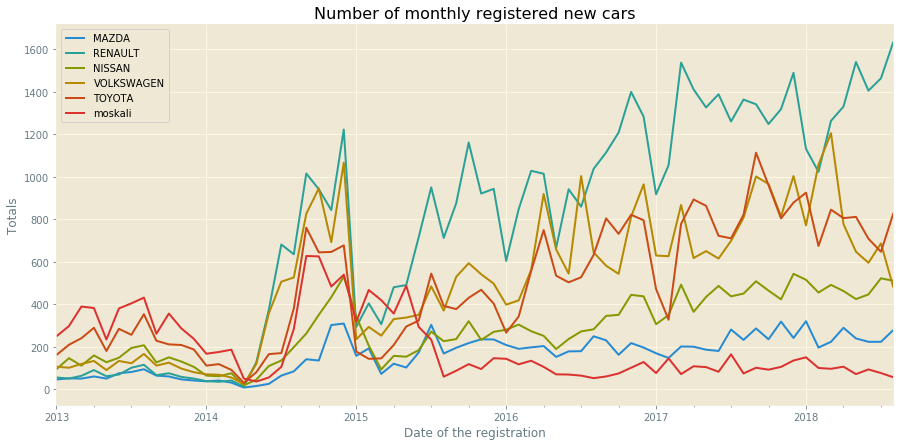

In [64]:
fig1, ax1 = plt.subplots(figsize=(15,7))

for data in df_brands:
    data[:'2018-8'].resample('M').Person.count().plot(ax=ax1)

df_moskal[:'2018-8'].resample('M').Person.count().plot(ax=ax1)


ax1.legend(respectful_brands 
           + ['moskali']
          )
ax1.set(xlabel='Date of the registration', ylabel='Totals', title='Number of monthly registered new cars')
fig1.patch.set_facecolor('white')

plt.show()

### Discovering trends

In [66]:
import statsmodels.api as sm

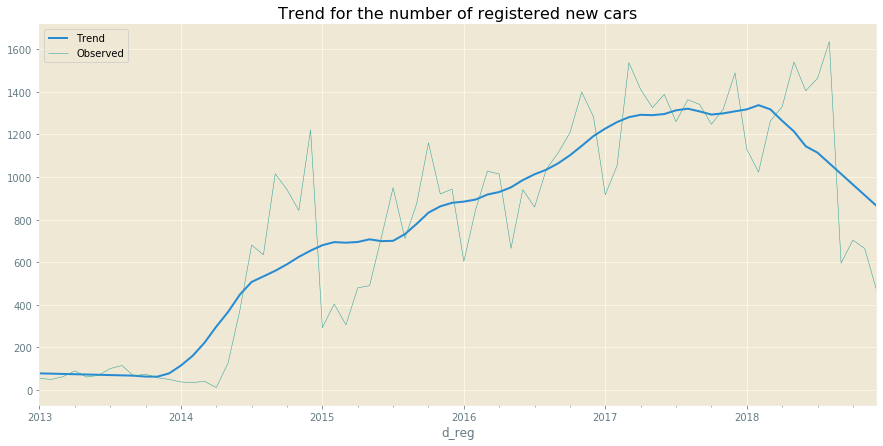

In [67]:
brs = ['RENAULT']
df_brand_all = df[(df['Oper_code'] == 100) & (df['Brand'].isin(brs))][:'2018']

decomposed = sm.tsa.seasonal_decompose(df_brand_all.resample('M').Person.count(), 
                                       extrapolate_trend=1, 
                                       freq=12)

# Create plot
fig2 = plt.figure(figsize=(15,7))

# Plot and customize
ax2 = decomposed.trend.plot(label='Trend', linewidth=2)
ax2 = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax2.set(title='Trend for the number of registered new cars')
ax2.legend()

plt.show()

### Compare UA market with world wide trends

Auto and Light Truck Sales Historical Chart [dataset](https://www.macrotrends.net/1372/auto-and-light-truck-sales-historical-chart)


In [69]:
df_global_trends = pd.read_csv('./datasets/auto-and-light-truck-sales-historical-chart.csv', 
                               parse_dates=['date'], index_col='date', skiprows=15, skipinitialspace=True)

df_global_trends = df_global_trends['2013':'2018-8']

In [70]:
df_global_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2013-01-01 to 2018-08-01
Data columns (total 1 columns):
value    68 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


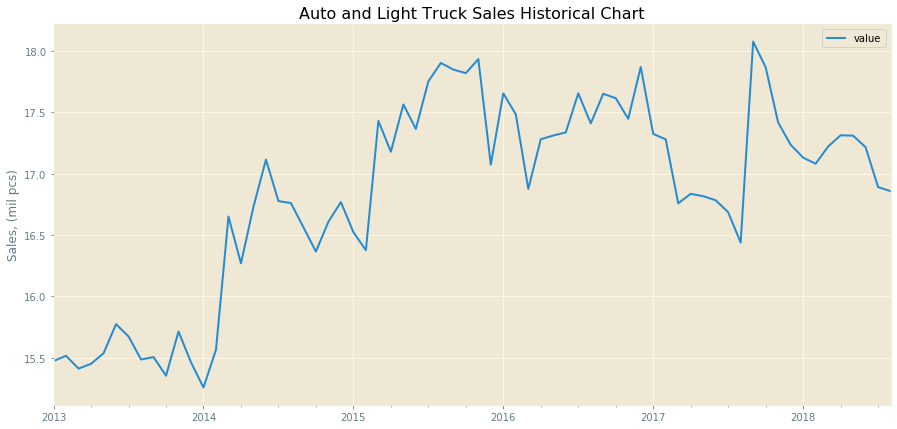

In [77]:
fig3, ax3 = plt.subplots(figsize=(15,7))
df_global_trends.plot(ax=ax3)
ax3.set(ylabel='Sales, (mil pcs)',
        xlabel='',
        title='Auto and Light Truck Sales Historical Chart',
       )

fig3.patch.set_facecolor('white')

plt.show()

In [80]:
# Normalization function for global trends
f = lambda x: (x - df_global_trends.value.min())/(df_global_trends.value.max() 
                                                  - df_global_trends.value.min())
df_global_trends_norm = df_global_trends['value'].apply(f)

In [81]:
df_renault = df_all_new[(df_all_new['Brand'] == 'RENAULT') 
                        & (df_all_new['Kind'] == 'ЛЕГКОВИЙ')]['2013':'2018-8']

df_renault_sales_monhtly = df_renault['Person'].resample('M').count()

In [82]:
# Normalization function for UA market (Renault) sales
fn = lambda x: (x - df_renault_sales_monhtly.min())/(df_renault_sales_monhtly.max() 
                                                     - df_renault_sales_monhtly.min())
df_renault_sales_monhtly_norm = df_renault_sales_monhtly.apply(fn)

In [83]:
df_renault_sales_monhtly_norm.tail()

d_reg
2018-04-30    0.709961
2018-05-31    0.812500
2018-06-30    0.731445
2018-07-31    0.769531
2018-08-31    0.966797
Freq: M, Name: Person, dtype: float64

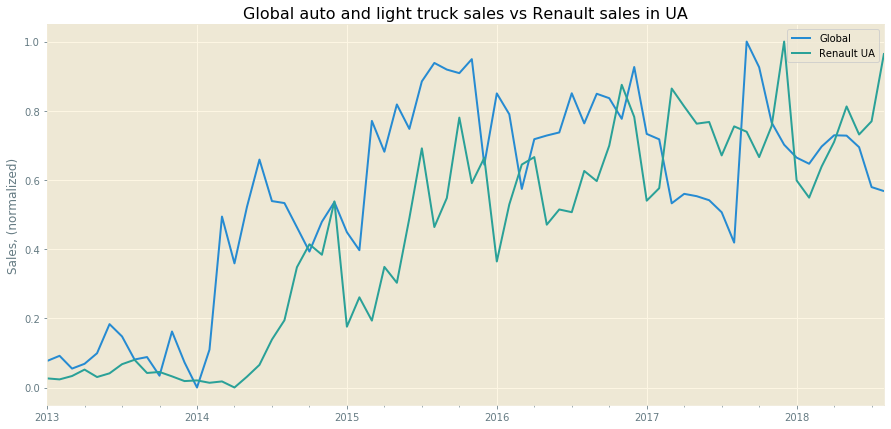

In [86]:
fig4, ax4 = plt.subplots(figsize=(15,7))
df_global_trends_norm.plot(ax=ax4)
df_renault_sales_monhtly_norm.plot(ax=ax4)

ax4.set(ylabel='Sales, (normalized)',
        xlabel='',
        title='Global auto and light truck sales vs Renault sales in UA')
ax4.legend(['Global', 'Renault UA'])
fig4.patch.set_facecolor('white')

plt.show()

### Disover and compare UA and global sales trends

In [87]:
window = 6 # Number in months

global_decomposed = sm.tsa.seasonal_decompose(df_global_trends_norm, 
                                       extrapolate_trend=1, 
                                       freq=window)

renault_decomposed = sm.tsa.seasonal_decompose(df_renault_sales_monhtly_norm, 
                                       extrapolate_trend=1, 
                                       freq=window)

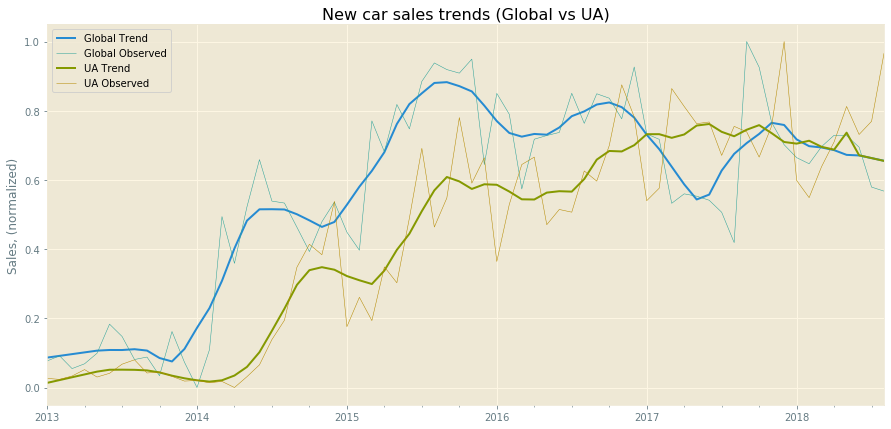

In [92]:
# Create plot
fig5 = plt.figure(figsize=(15,7))

# Plot and customize
ax5 = global_decomposed.trend.plot(label='Global Trend', linewidth=2)
global_decomposed.observed.plot(label='Global Observed', linewidth=0.5, ax=ax5)
renault_decomposed.trend.plot(label='UA Trend', linewidth=2, ax=ax5)
renault_decomposed.observed.plot(label='UA Observed', linewidth=0.5, ax=ax5)

ax5.set(title='New car sales trends (Global vs UA)',
        xlabel='',
        ylabel='Sales, (normalized)',
       )
ax5.legend()
fig5.patch.set_facecolor('white')

plt.show()
